In [2]:
import numpy as np
import pandas as pd
import joblib

In [3]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

c:\Users\ASUS\Desktop\Disease-Prediction-using-Django-and-machine-learning-master\.venv\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
c:\Users\ASUS\Desktop\Disease-Prediction-using-Django-and-machine-learning-master\.venv\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20

In [4]:
def evaluate_preds(y_true, y_pred):
    """
    Evaluate predictions using confusion matrix and classification report.
    """
    print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))
    print('\nClassification Report:\n', classification_report(y_true, y_pred))

In [5]:
# Reading a dataset from a CSV file using Pandas and storing it in a DataFrame object called df.
df = pd.read_csv('C:/Users/ASUS/Downloads/FYP WEBSITE/Vector Borne Disease Dataset/kaggle/input/vector-borne-disease-prediction/trainn.csv')

# Generating summary statistics of the dataset
df.describe()

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,0.515873,0.460317,0.519841,0.547619,0.519841,0.503968,0.480159,0.496032,0.452381,0.468254,...,0.246032,0.170635,0.198413,0.178571,0.182540,0.202381,0.154762,0.170635,0.119048,0.123016
std,0.500743,0.499415,0.500600,0.498718,0.500600,0.500979,0.500600,0.500979,0.498718,0.499984,...,0.431554,0.376938,0.399598,0.383755,0.387057,0.402574,0.362397,0.376938,0.324489,0.329109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Displaying the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   sudden_fever           252 non-null    int64 
 1   headache               252 non-null    int64 
 2   mouth_bleed            252 non-null    int64 
 3   nose_bleed             252 non-null    int64 
 4   muscle_pain            252 non-null    int64 
 5   joint_pain             252 non-null    int64 
 6   vomiting               252 non-null    int64 
 7   rash                   252 non-null    int64 
 8   diarrhea               252 non-null    int64 
 9   hypotension            252 non-null    int64 
 10  pleural_effusion       252 non-null    int64 
 11  ascites                252 non-null    int64 
 12  gastro_bleeding        252 non-null    int64 
 13  swelling               252 non-null    int64 
 14  nausea                 252 non-null    int64 
 15  chills                 

In [7]:
df.shape

(252, 65)

<AxesSubplot:>

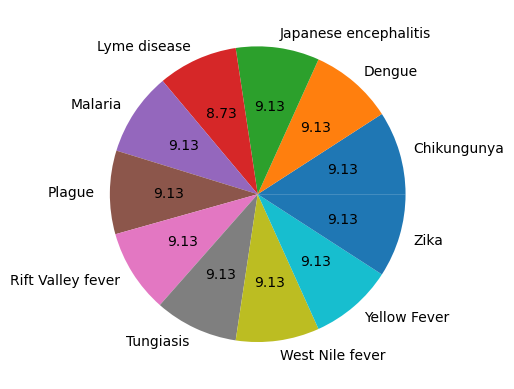

In [8]:
# Plotting a pie chart of the number of occurrences of each prognosis using groupby() and plot() functions
df.groupby('prognosis').size().plot(kind='pie', autopct='%.2f', label='')

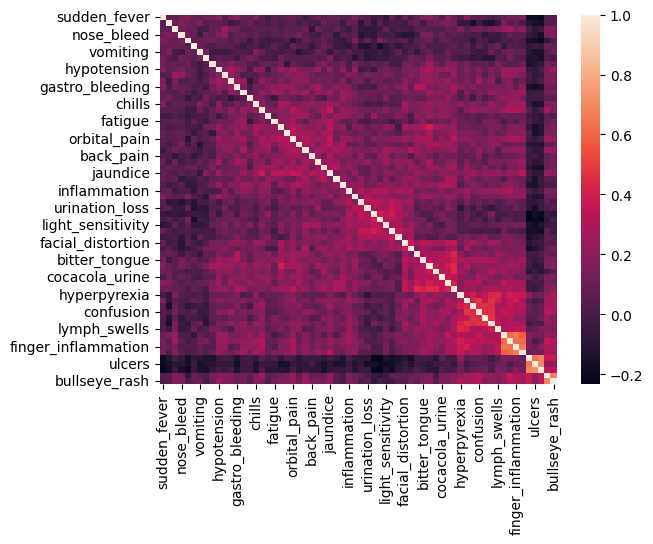

In [9]:
# Plotting a correlation matrix of the dataset using a heatmap with sns.heatmap() function of Seaborn and plt.show() function of Matplotlib.
sns.heatmap(df.corr())
plt.show()

In [10]:
# Using the chi-squared test to perform feature selection using SelectKBest() function of scikit-learn and storing the p-values in a Pandas Series object called p_values.
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(df.drop(columns=['prognosis']), df['prognosis'])
p_values = pd.Series(chi2_selector.pvalues_)
p_values.index = df.drop(columns=['prognosis']).columns
p_values.sort_values(ascending=True, inplace=True)
print(p_values)

speech_problem    1.479529e-30
bullseye_rash     5.462412e-30
toenail_loss      3.417364e-28
ulcers            6.245624e-26
itchiness         2.056296e-25
                      ...     
rash              8.582283e-02
mouth_bleed       1.257875e-01
vomiting          1.738650e-01
muscle_pain       2.200208e-01
joint_pain        3.209356e-01
Length: 64, dtype: float64


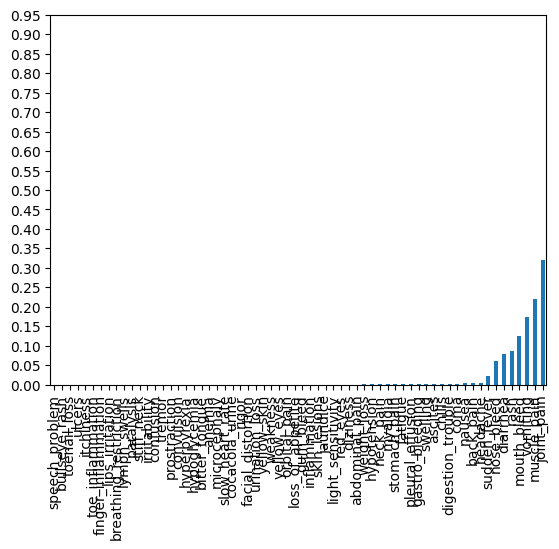

Uninformative columns:
 sudden_fever    0.022979
nose_bleed      0.060156
diarrhea        0.078984
rash            0.085823
mouth_bleed     0.125788
vomiting        0.173865
muscle_pain     0.220021
joint_pain      0.320936
dtype: float64


In [11]:
# Sorting the p-values in ascending order and displaying them as a bar plot
p_values.plot.bar()
plt.yticks([i / 20 for i in range(20)])
plt.show()
print('Uninformative columns:\n', p_values[p_values > 0.01])

In [12]:
# Dropping uninformative columns with a p-value greater than 0.01 and creating four new DataFrames
df_p_5 = df.drop(columns=['joint_pain', 'muscle_pain', 'vomiting', 'mouth_bleed', 'rash', 'diarrhea', 'nose_bleed'])
df_p_1 = df.drop(columns=['joint_pain', 'muscle_pain', 'vomiting', 'mouth_bleed', 'rash', 'diarrhea', 'nose_bleed', 'sudden_fever'])
df_p_10 = df.drop(columns=['joint_pain', 'muscle_pain', 'vomiting', 'mouth_bleed'])
df_p_20 = df.drop(columns=['joint_pain', 'muscle_pain'])

In [13]:
# Splitting the original dataset and four new DataFrames into training and testing sets using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['prognosis']), df.prognosis, test_size=0.3)
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(df_p_20.drop(columns=['prognosis']), df_p_20.prognosis, test_size=0.3)
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(df_p_10.drop(columns=['prognosis']), df_p_10.prognosis, test_size=0.3)
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(df_p_5.drop(columns=['prognosis']), df_p_5.prognosis, test_size=0.3)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_p_1.drop(columns=['prognosis']), df_p_1.prognosis, test_size=0.3)

In [14]:
# Fitting a Multinomial Naive Bayes model to each training set, and evaluating the model's performance using classification_report()
NB = MultinomialNB().fit(X_train, y_train)
print(classification_report(NB.predict(X_train), y_train))
print(classification_report(NB.predict(X_test), y_test))

                       precision    recall  f1-score   support

          Chikungunya       1.00      0.88      0.94        17
               Dengue       0.86      1.00      0.92        12
Japanese encephalitis       0.94      1.00      0.97        17
         Lyme disease       1.00      1.00      1.00        16
              Malaria       1.00      0.89      0.94        18
               Plague       1.00      1.00      1.00        17
    Rift Valley fever       0.94      0.94      0.94        17
            Tungiasis       1.00      1.00      1.00        12
      West Nile fever       1.00      1.00      1.00        17
         Yellow Fever       0.88      1.00      0.93        14
                 Zika       1.00      0.95      0.97        19

             accuracy                           0.97       176
            macro avg       0.97      0.97      0.97       176
         weighted avg       0.97      0.97      0.97       176

                       precision    recall  f1-score

In [15]:
# Train the model
NB = MultinomialNB().fit(X_train, y_train)

In [16]:
# Save the model to a file using joblib
filename = 'model.joblib'
joblib.dump(NB, filename)

['model.joblib']

In [17]:
# Load the saved model from file
loaded_model = joblib.load(filename)

In [18]:
# Use the loaded model for prediction
y_pred = loaded_model.predict(X_test)
evaluate_preds(y_test, y_pred)

Confusion Matrix:
 [[ 8  0  0  0  0  0  0  0  0  0  0]
 [ 1  4  0  0  1  0  2  0  0  1  0]
 [ 0  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  1]
 [ 0  0  0  0  0  0  0  0  0  1  4]]

Classification Report:
                        precision    recall  f1-score   support

          Chikungunya       0.89      1.00      0.94         8
               Dengue       1.00      0.44      0.62         9
Japanese encephalitis       1.00      1.00      1.00         5
         Lyme disease       1.00      1.00      1.00         6
              Malaria       0.88      1.00      0.93         7
               Plague       1.00      1.00      1.00         6
    Rift Valley fever       0.75      1.00      0.86         6
            Tungiasis       1.00      1.00      1.00  

In [20]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(accuracy)

90.78947368421053
